## Importing dependencies

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [63]:
df = pd.read_csv(f'Flipkart.csv')
df

,Unnamed: 0,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...","₹9,799",Galaxy F13,Nightsky Green,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...","₹9,799",Galaxy F13,Sunrise Copper,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...","₹9,799",Galaxy F13,Waterfall Blue,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,3,"REDMI 10 (Pacific Blue, 64 GB) (4 GB RAM)","₹9,999",10,Pacific Blue,Dual Sim,Yes,17.02 cm (6.7 inch),1650 x 720 Pixels,Android 11,...,3.5mm,Yes,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,4,"APPLE iPhone 13 (Starlight, 128 GB)","₹58,999",iPhone 13,Starlight,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,...,3.5mm,Yes,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,219,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...","₹21,962",iPhone 13,(PRODUCT)RED,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,...,3.5mm,Yes,5000 mAh,188 g,1 Year,4.3,4.1,4.1,4.2,4.1
220,220,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB) ...","₹14,490",iPhone 13,(PRODUCT)RED,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,...,3.5mm,Yes,5000 mAh,188 g,1 Year,4.2,3.7,4.4,3.9,3.7
221,221,"vivo T1X (Gravity Black, 128 GB) (6 GB RAM)","₹14,999",iPhone 13,(PRODUCT)RED,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,...,3.5mm,Yes,5000 mAh,188 g,1 Year,4.4,4.0,4.2,4.2,4.2
222,222,"vivo T1X (Space Blue, 128 GB) (4 GB RAM)","₹12,999",iPhone 13,(PRODUCT)RED,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,...,3.5mm,Yes,5000 mAh,188 g,1 Year,4.5,4.0,4.3,4.2,4.3


### 1. Removing redundant columns (Data Analysis Technique - 1)
Redundant index columns merely reflect the row numbers or identifiers and do not contribute meaningful information to the analysis. By eliminating these columns, the dataset becomes more streamlined, enhancing clarity and simplifying interpretation. 

In [64]:
df = df.iloc[:, 1:]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        220 non-null    object 
 1   Price                       224 non-null    object 
 2   Model Name                  223 non-null    object 
 3   Color                       223 non-null    object 
 4   SIM Type                    223 non-null    object 
 5   Touchscreen                 223 non-null    object 
 6   Display Size                223 non-null    object 
 7   Resolution                  223 non-null    object 
 8   Operating System            223 non-null    object 
 9   Processor Core              222 non-null    object 
 10  Primary Clock Speed         222 non-null    object 
 11  Internal Storage            221 non-null    object 
 12  RAM                         223 non-null    object 
 13  Primary Camera Available    222 non

### 2. Checking for null values (Data Analysis Technique - 2)
Since our data has multiple columns, before proceeding with any other data processing steps, it is crucial to check for null values in the data 

In [66]:
df.isnull().sum()

Name                           4
Price                          0
Model Name                     1
Color                          1
SIM Type                       1
Touchscreen                    1
Display Size                   1
Resolution                     1
Operating System               1
Processor Core                 2
Primary Clock Speed            2
Internal Storage               3
RAM                            1
Primary Camera Available       2
Primary Camera                 1
Secondary Camera Available     2
Secondary Camera               2
Full HD Recording              3
Network Type                   1
Bluetooth Support             25
Wi-Fi                          6
Audio Jack                    27
GPS Support                    2
Battery Capacity               1
Weight                         2
Domestic Warranty             25
Product Rating                 0
Camera Rating                  0
Battery Rating                 0
Display Rating                 0
Design Rat

### 3. Filling null values (Data Analysis Technique - 3)
Filling NA (missing) values in a dataset is essential to ensure the completeness and accuracy of the data for analysis. By filling NA values, we prevent the loss of valuable information that could affect the integrity of the analysis results. Moreover, it helps in maintaining consistency across the dataset, ensuring that subsequent operations such as statistical analysis or machine learning modeling can be performed effectively without encountering errors or biases due to missing data. 

In [67]:
for col in ['Bluetooth Support', 'Wi-Fi', 'Audio Jack', 'Domestic Warranty', 'Network Type', 'Primary Camera Available', 'Secondary Camera Available', 'Full HD Recording', 'GPS Support', 'RAM'] :
    print(f'Unique values in {col} are {df[col].unique()}')

Unique values in Bluetooth Support are ['Yes' 'No' nan]
Unique values in Wi-Fi are ['Yes' 'No' nan]
Unique values in Audio Jack are ['3.5mm' 'Yes' nan '3.5 mm' '3.5']
Unique values in Domestic Warranty are ['1 Year' nan '0' '12 Months' '2 Year']
Unique values in Network Type are ['4G, 3G, 2G' '4G VOLTE, 4G, 3G, 2G' '5G, 4G, 3G, 2G' '2G, 3G, 4G'
 '2G, 3G, 4G, 5G' '2G' '5G, 4G VOLTE, 4G, 3G, 2G' '2G, 3G, 4G, 4G VOLTE'
 nan '4G' '5G' '4G VOLTE' '2G, 3G, 4G, 4G VOLTE, 5G']
Unique values in Primary Camera Available are ['Yes' 'No' nan]
Unique values in Secondary Camera Available are ['Yes' 'No' nan]
Unique values in Full HD Recording are ['Yes' 'No' nan]
Unique values in GPS Support are ['Yes' 'No' nan]
Unique values in RAM are ['4 GB' '8 GB' '6 GB' '2 GB' '32 MB' '3 GB' nan '4 MB' '64 MB']


Using domain knowledge about recent smartphones -
- We know most smartphones nowadays have a bluetooth support. Thus, we are replacing the nan values in the column with 'Yes'.
- We know most smartphones nowadays have WiFi support. Thus, we are replacing the nan values in the column with 'Yes'.
- We know most smartphones nowadays do not have a Audio Jack WiFi support. Thus, we are replacing the nan values in the column with 'No'.
- We know that smartphones nowadays have 2G, 3G, 4G connectivitity.
- We know that smartphones nowadays have primary camera.
- We know that smartphones nowadays have secondary camera.

In [68]:
df_cleaned = df.copy()

In [69]:
df_cleaned = df_cleaned.dropna(subset='Name')

In [70]:
df_cleaned['Bluetooth Support'] = df_cleaned['Bluetooth Support'].fillna('Yes')

In [71]:
df_cleaned['Wi-Fi'] = df_cleaned['Wi-Fi'].fillna('Yes')

In [72]:
df_cleaned['Audio Jack'] = df_cleaned['Audio Jack'].fillna('Yes')

In [73]:
df_cleaned['Primary Camera'] = df_cleaned['Audio Jack'].fillna('Yes')

In [74]:
df_cleaned['Network Type'] = df_cleaned['Network Type'].fillna('2G, 3G, 4G')

In [75]:
df_cleaned['Primary Camera Available'] = df_cleaned['Primary Camera Available'].fillna('Yes')

In [76]:
df_cleaned['Secondary Camera Available'] = df_cleaned['Secondary Camera Available'].fillna('Yes')

For the columns [`Full HD Recording`, `GPS Support`, `Network Type`, `Battery Capacity`, `Processor Core`, `Primary Clock Speed`, `Primary Camera`] we fill the null values by the most frequently occuring value (or the mode) in the column since it is a better representative of trends in majority of smartphones.

In [77]:
mode_full_hd_recording = df_cleaned['Full HD Recording'].value_counts().index[0]
df_cleaned['Full HD Recording'] = df_cleaned['Full HD Recording'].fillna(mode_full_hd_recording)

In [78]:
mode_gps_support = df_cleaned['GPS Support'].value_counts().index[0]
df_cleaned['GPS Support'] = df_cleaned['GPS Support'].fillna(mode_gps_support)

In [79]:
df_cleaned = pd.concat((df_cleaned, df_cleaned['Network Type'].str.get_dummies(sep=', ')), axis=1)
df_cleaned = df_cleaned.drop(columns=['Network Type'])

In [80]:
mode_battery_capacity = df_cleaned['Battery Capacity'].value_counts().index[0]
df_cleaned['Battery Capacity'] = df_cleaned['Battery Capacity'].fillna(mode_battery_capacity)

In [81]:
mode_processor_core = df_cleaned['Processor Core'].value_counts().index[0]
df_cleaned['Processor Core'] = df_cleaned['Processor Core'].fillna(mode_processor_core)

In [82]:
mode_clock_speed = df_cleaned['Primary Clock Speed'].value_counts().index[0]
df_cleaned['Primary Clock Speed'] = df_cleaned['Primary Clock Speed'].fillna(mode_clock_speed)

In [83]:
mode_primary_camera = df_cleaned['Primary Camera'].value_counts().index[0]
df_cleaned['Primary Camera'] = df_cleaned['Primary Camera'].fillna(mode_primary_camera)

### 4. Feature Transformation (Data Analysis Technique - 4)
We extract the numerical information from columns containing strings so that better analysis techniques can be applied to the numerical data like mean, standard deviation

In `Battery Capacity` column, since each value is in mAh it is redundant to be included in each record, thus we extract only the numerical value of the battery size.

In [84]:
df_cleaned['Battery Capacity'] = df_cleaned['Battery Capacity'].str.extract('(\d+)').astype(float)

In `Price` colummn, since each value is in ₹  it is redundant to be included in each record, thus we remove the currency symbol and commas from the column and extract only the numerical price. 

In [85]:
df_cleaned['Price'] = df_cleaned['Price'].str.replace('[^\d]', '', regex=True).astype(int)

In `Weight` column, since each value is in g(grams) it is redundant to be included in each record, thus we remove the weight unit symbol and extract only the numerical weight. Further, we fill the null values with the mean of the column.

In [86]:
df_cleaned['Weight'] = df_cleaned['Weight'].str.extract('(\d+)').astype(float)
df_cleaned['Weight'] = df_cleaned['Weight'].fillna(df_cleaned['Weight'].mean())

In `Domestic Warranty` column, we map the unique string values with numerbers equivalent to the months of warrants. We fill the null values with a warranty of 0.

In [87]:
df_cleaned['Domestic Warranty'].unique()

array(['1 Year', nan, '0', '12 Months', '2 Year'], dtype=object)

In [88]:
mapping = {'1 Year': 12, '0': 0, '12 Months': 12, '2 Year': 24, np.nan: 0}

df_cleaned['Domestic Warranty']= df_cleaned['Domestic Warranty'].map(mapping)

In columns [`Internal Storage`, `RAM`], we convert the data into numerical figures representing the values in GB since it is a standard for smarphones RAM and storage be measured in GB. Further, we fill the null values with the mean of the column.

In [89]:
def convert_to_gb(value):
    if isinstance(value, str) :
        if 'GB' in value:
            return float(value.replace(' GB', ''))
        elif 'MB' in value:
            return float(value.replace(' MB', '')) / 1024  # Convert MB to GB
        else:
            return 0  # Handle other cases like '0 GB', '0 MB', etc.
    else :
        return np.nan

In [90]:
df_cleaned['Internal Storage'] = df_cleaned['Internal Storage'].apply(convert_to_gb).apply(float)

df_cleaned.rename(columns={'Internal Storage': 'Internal Storage (GB)'}, inplace=True)

df_cleaned['Internal Storage (GB)'] = df_cleaned['Internal Storage (GB)'].fillna(df_cleaned['Internal Storage (GB)'].mean())

In [91]:
df_cleaned['RAM'] = df_cleaned['RAM'].apply(convert_to_gb).astype(float)

df_cleaned.rename(columns={'RAM': 'RAM (GB)'}, inplace=True)

In `Secondary Camera`, since each value is in 'xMP Front Camera' it is redundant to be included in each record, thus we remove the 'MP Front Camera' part and extract only the numerical value of the MP. Further, we fill the null values with the mean of the column.

In [92]:
df['Secondary Camera'].value_counts()

Secondary Camera
8MP Front Camera      68
16MP Front Camera     53
5MP Front Camera      47
12MP Front Camera     19
13MP Front Camera     17
0MP Front Camera       9
50MP Front Camera      8
0.3MP Front Camera     1
Name: count, dtype: int64

In [93]:
df_cleaned['Secondary Camera'] = df_cleaned['Secondary Camera'].str.extract('(\d+)').astype(float)
df_cleaned['Secondary Camera'] = df_cleaned['Secondary Camera'].fillna(df_cleaned['Secondary Camera'].mean()).astype(int)
df_cleaned.rename(columns={'Secondary Camera' : 'Secondary Camera (MP, Front Camera)'}, inplace=True)

In [94]:
sim_mapping = {'Dual Sim' : 2, 'Single Sim' : 1, 'Dual Sim(Nano + eSIM)' : 0}
df_cleaned['SIM Type'] = df_cleaned['SIM Type'].map(sim_mapping)

In [97]:
processor_mapping = {'Octa Core' : 8, 'Hexa Core' : 6, 'Quad Core' : 4, 'Single Core' : 1}
df_cleaned['Processor Core'] = df_cleaned['Processor Core'].map(processor_mapping)

### 5. Feature Generation (Data Analysis Technique - 5)
This feature generation technique is employed to transform unstructured textual data into a structured numerical format, primarily for enhanced analysis and interpretation. By extracting numeric values from the 'Resolution' column and splitting them into separate 'Height' and 'Width' columns, the dataset becomes more organized and suitable for various analytical tasks. Handling missing values by filling them with the mode ensures the robustness of subsequent operations and maintains the dataset's representativeness. Converting data types to integers facilitates numerical computations and statistical analyses, enabling researchers to derive meaningful insights from the data. Additionally, dropping the original 'Resolution' column streamlines the dataset, eliminating redundancy and improving computational efficiency. 

In [156]:
df_cleaned['Resolution'] = df_cleaned['Resolution'].str.extract('(\d+ x \d+)')
mode_resolution = df_cleaned['Resolution'].value_counts().index[0]
df_cleaned['Resolution'] = df_cleaned['Resolution'].fillna(mode_resolution)
df_cleaned[['Height', 'Width']] = df_cleaned['Resolution'].str.split(' x ', expand=True)
df_cleaned[['Height', 'Width']] = df_cleaned[['Height', 'Width']].astype(int)
df_cleaned = df_cleaned.drop(columns=['Resolution'])

In [157]:
os_map = {'Android' : 0, 'iPhone' : 1}
iphone_regex = r'iPhone'
df_cleaned['OS'] = df_cleaned['Name'].str.contains(iphone_regex, case=False).astype(np.int32)

### 6. Binary Encoding (Data Analysis Technique - 6)
We convert the remaining binary categorical features into numerical binaros_mapencoded features where 1 - 'Yes' and 0 - 'No'.

By converting categorical variables like 'Yes' and 'No' into numerical equivalents (1 and 0, respectively), we transform the data into a format that can be easily understood and processed by algorithms. This transformation enables us to perform various statistical analysis, build predictive models, and extract meaningful insights from the data.

Furthermore, replacing categorical values with numerical equivalents helps in standardizing the data and making it consistent across different variables, which is crucial for ensuring the effectiveness of machine learning algorithms.

In [158]:
df_cleaned = df_cleaned.replace({'Yes': 1, 'No': 0})

In [159]:
df_cleaned

,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Operating System,Processor Core,Primary Clock Speed,...,Display Rating,Design Rating,2G,3G,4G,4G VOLTE,5G,OS,Height,Width
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...",9799,Galaxy F13,Nightsky Green,2,1,16.76 cm (6.6 inch),Android 12,8,2 GHz,...,4.0,4.0,1,1,1,0,0,0,2408,1080
1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...",9799,Galaxy F13,Sunrise Copper,2,1,16.76 cm (6.6 inch),Android 12,8,2 GHz,...,4.0,4.0,1,1,1,0,0,0,2408,1080
2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...",9799,Galaxy F13,Waterfall Blue,2,1,16.76 cm (6.6 inch),Android 12,8,2 GHz,...,4.0,4.0,1,1,1,0,0,0,2408,1080
3,"REDMI 10 (Pacific Blue, 64 GB) (4 GB RAM)",9999,10,Pacific Blue,2,1,17.02 cm (6.7 inch),Android 11,8,2.4 GHz,...,3.9,3.9,1,1,1,1,0,0,1650,720
4,"APPLE iPhone 13 (Starlight, 128 GB)",58999,iPhone 13,Starlight,2,1,15.49 cm (6.1 inch),iOS 15,6,2.4 GHz,...,4.7,4.6,1,1,1,1,0,1,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...",21962,iPhone 13,(PRODUCT)RED,2,1,15.49 cm (6.1 inch),iOS 15,6,2.4 GHz,...,4.2,4.1,1,1,1,0,1,0,2532,1170
220,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB) ...",14490,iPhone 13,(PRODUCT)RED,2,1,15.49 cm (6.1 inch),iOS 15,6,2.4 GHz,...,3.9,3.7,1,1,1,0,1,0,2532,1170
221,"vivo T1X (Gravity Black, 128 GB) (6 GB RAM)",14999,iPhone 13,(PRODUCT)RED,2,1,15.49 cm (6.1 inch),iOS 15,6,2.4 GHz,...,4.2,4.2,1,1,1,0,1,0,2532,1170
222,"vivo T1X (Space Blue, 128 GB) (4 GB RAM)",12999,iPhone 13,(PRODUCT)RED,2,1,15.49 cm (6.1 inch),iOS 15,6,2.4 GHz,...,4.2,4.3,1,1,1,0,1,0,2532,1170


In [160]:
df_cleaned.isnull().sum()

Name                                   0
Price                                  0
Model Name                             0
Color                                  0
SIM Type                               0
Touchscreen                            0
Display Size                           0
Operating System                       0
Processor Core                         0
Primary Clock Speed                    0
Internal Storage (GB)                  0
RAM (GB)                               0
Primary Camera Available               0
Primary Camera                         0
Secondary Camera Available             0
Secondary Camera (MP, Front Camera)    0
Full HD Recording                      0
Bluetooth Support                      0
Wi-Fi                                  0
Audio Jack                             0
GPS Support                            0
Battery Capacity                       0
Weight                                 0
Domestic Warranty                      0
Product Rating  

In [161]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 223
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 220 non-null    object 
 1   Price                                220 non-null    int32  
 2   Model Name                           220 non-null    object 
 3   Color                                220 non-null    object 
 4   SIM Type                             220 non-null    int64  
 5   Touchscreen                          220 non-null    int64  
 6   Display Size                         220 non-null    object 
 7   Operating System                     220 non-null    object 
 8   Processor Core                       220 non-null    int64  
 9   Primary Clock Speed                  220 non-null    object 
 10  Internal Storage (GB)                220 non-null    float64
 11  RAM (GB)                             

### 7. Correlation Analysis (Data Analysis Technique - 7)
We employed correlation analysis to investigate the linear relationship between numerical variables in the dataset. By calculating the correlation coefficients between pairs of variables using methods like Pearson correlation, we gain insights into how changes in one variable might relate to changes in another. This analysis helps in identifying potential associations or dependencies between variables, which is valuable for tasks such as feature selection, model building, and understanding the underlying structure of the data. 

In [38]:
corr = df_cleaned.select_dtypes(include=[int, float]).corr()
corr

,Price,Touchscreen,Internal Storage (GB),RAM (GB),Primary Camera Available,Secondary Camera Available,"Secondary Camera (MP, Front Camera)",Full HD Recording,Bluetooth Support,Wi-Fi,...,Battery Rating,Display Rating,Design Rating,2G,3G,4G,4G VOLTE,5G,Height,Width
Price,1.000000,0.387938,0.451767,0.352207,0.234114,0.255596,0.178473,0.232962,0.158135,0.293908,...,0.170746,0.293067,0.235525,0.048282,0.367300,0.353253,0.126596,0.316403,0.371359,0.349660
Touchscreen,0.387938,1.000000,0.653965,0.621976,0.630671,0.680746,-0.039708,0.730028,0.456221,0.773740,...,0.032432,0.054779,0.013742,0.096107,0.929396,0.887998,0.193018,0.294501,0.732152,0.671307
Internal Storage (GB),0.451767,0.653965,1.000000,0.769870,0.373965,0.413431,0.190966,0.452193,0.319695,0.485151,...,-0.025921,0.022074,-0.018256,0.092744,0.618356,0.588571,0.043283,0.572764,0.642513,0.596712
RAM (GB),0.352207,0.621976,0.769870,1.000000,0.389091,0.367771,0.398601,0.439397,0.321835,0.444971,...,0.125163,0.181946,0.141214,0.075531,0.580331,0.549687,0.013542,0.572746,0.612388,0.561971
Primary Camera Available,0.234114,0.630671,0.373965,0.389091,1.000000,0.926441,0.144706,0.670421,0.723390,0.746468,...,0.004177,0.017673,0.006362,-0.041962,0.586143,0.607422,0.121731,0.185733,0.476358,0.452919
Secondary Camera Available,0.255596,0.680746,0.413431,0.367771,0.926441,1.000000,0.047036,0.614841,0.670179,0.751415,...,0.015097,0.024518,0.010335,-0.045294,0.632682,0.655651,0.131396,0.200480,0.479798,0.440793
"Secondary Camera (MP, Front Camera)",0.178473,-0.039708,0.190966,0.398601,0.144706,0.047036,1.000000,-0.105537,0.041594,0.024308,...,0.034290,0.106579,0.089983,-0.104442,-0.030648,0.024056,-0.159641,0.351429,0.127725,0.131098
Full HD Recording,0.232962,0.730028,0.452193,0.439397,0.670421,0.614841,-0.105537,1.000000,0.445910,0.846917,...,0.008224,0.002803,-0.017410,0.033997,0.675889,0.659648,0.165976,0.160075,0.540724,0.412343
Bluetooth Support,0.158135,0.456221,0.319695,0.321835,0.723390,0.670179,0.041594,0.445910,1.000000,0.497436,...,0.029024,0.020382,0.023440,-0.030355,0.424010,0.439403,0.088059,0.134358,0.310830,0.298743
Wi-Fi,0.293908,0.773740,0.485151,0.444971,0.746468,0.751415,0.024308,0.846917,0.497436,1.000000,...,0.012147,0.027515,0.010105,-0.051481,0.719111,0.745217,0.149346,0.227867,0.494427,0.457660


Text(0.5, 1.0, 'Correlation Heatmap')

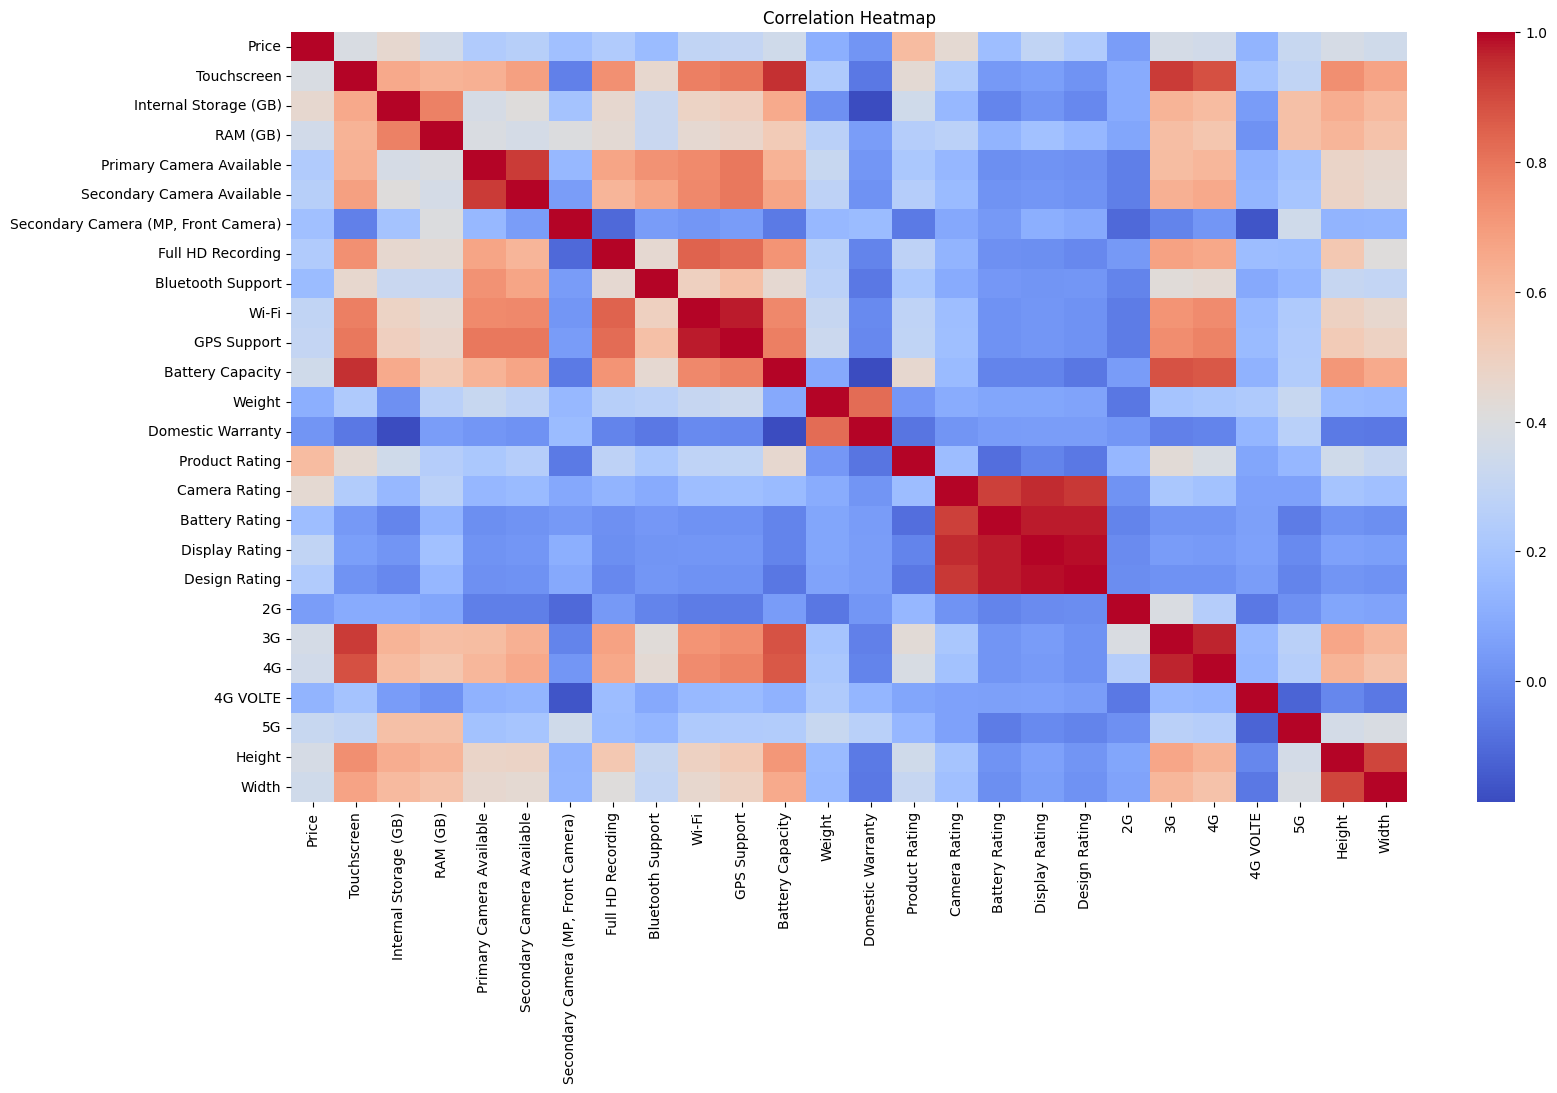

In [162]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')

### 8. Data Visualisations (Data Analysis Technique - 8)
We use different visualisations like histogram plot, box plot, scatter plot, pie chart to find the distribution of data values

In [40]:
def plot_distribution(df : pd.Series) :
    min_value = df.min()
    max_value = df.max()
    mean_value = df.mean()
    median_value = df.median()
    mode_values = df.mode()
    
    print(f'The minimum value is {min_value:.2f}\nThe maximum value is {max_value:.2f}\nThe mean value is {mean_value:.2f}\nThe median value is {median_value:.2f}\nThe mode values are {mode_values.values}')
    
    fig, ax = plt.subplots(2, 1, figsize = (8,6))

    #ax[0].hist(df, alpha = 0.5)
    #sns.kdeplot(df, ax=ax[0], linewidth = 2)
    #sns.histplot(df, ax=ax[0], kde = True)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        sns.distplot(df, ax=ax[0])
    ax[0].set_ylabel('Density')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 1, label = 'Min', alpha=0.5)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 1, label = 'Mean', alpha=0.5)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 1, label = 'Median', alpha=0.5)
    for mode in mode_values :
        ax[0].axvline(x=mode, color = 'yellow', linestyle='dashed', linewidth = 1, label = 'Mode', alpha=0.5)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 1, label = 'Max', alpha=0.5)
    ax[0].legend()

    ax[1].boxplot(df, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle(df.name)
    plt.grid()
    plt.tight_layout()
    plt.show()

The minimum value is 899.00
The maximum value is 71999.00
The mean value is 12872.78
The median value is 10499.00
The mode values are [9999]


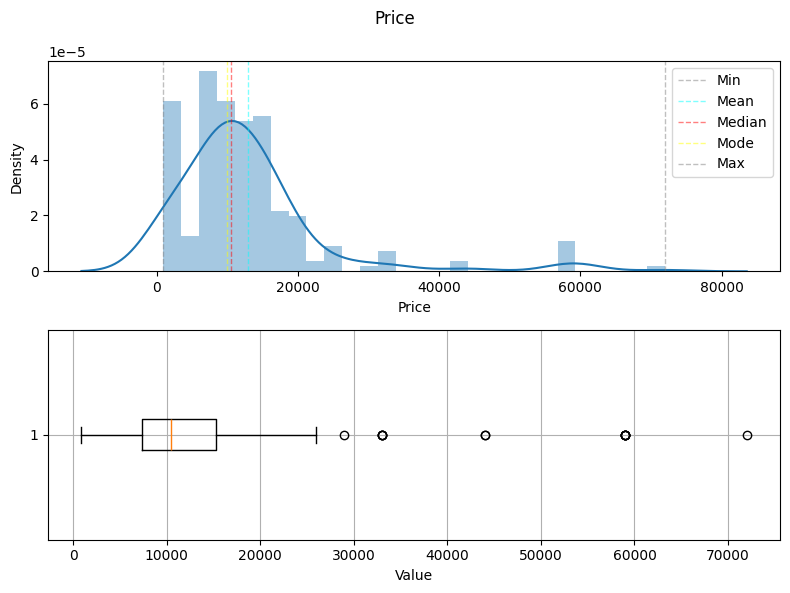

In [41]:
plot_distribution(df_cleaned['Price'])

The minimum value is 128.00
The maximum value is 2532.00
The mean value is 2096.24
The median value is 2400.00
The mode values are [2532]


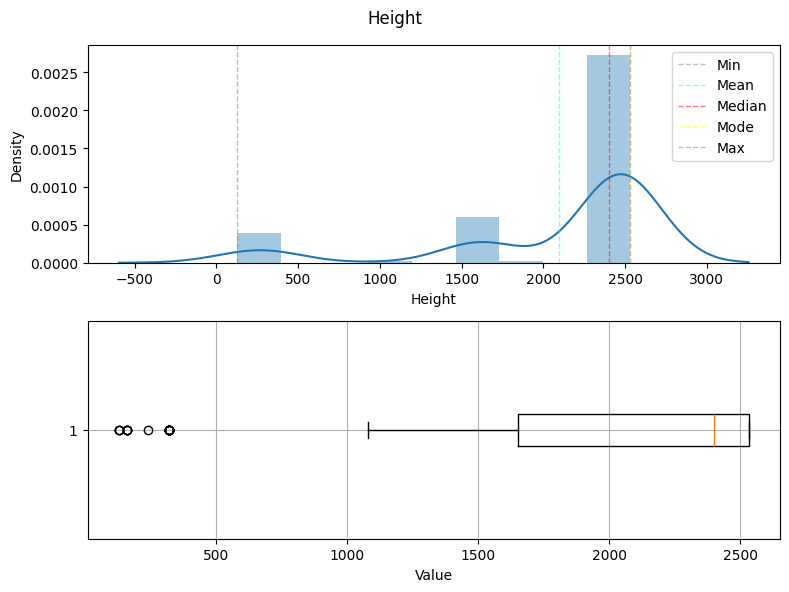

In [42]:
plot_distribution(df_cleaned['Height'])

The minimum value is 128.00
The maximum value is 2408.00
The mean value is 973.31
The median value is 1080.00
The mode values are [1170]


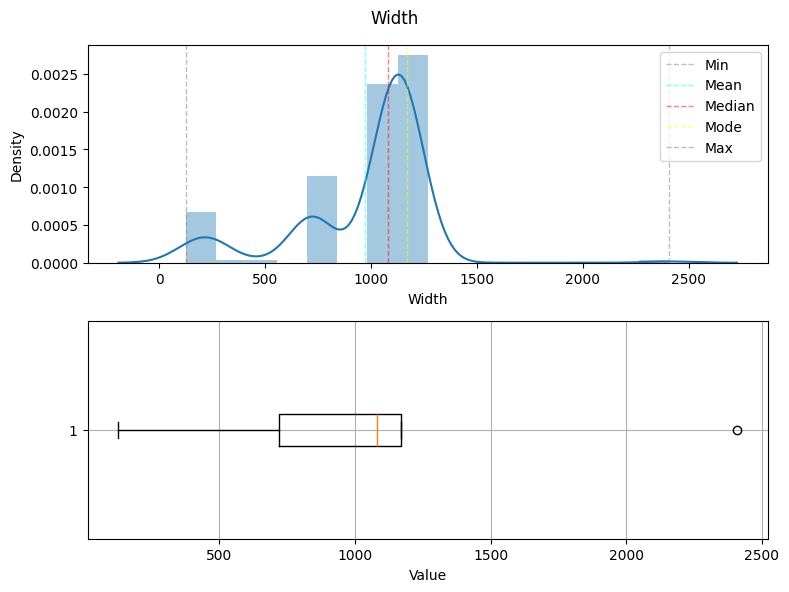

In [43]:
plot_distribution(df_cleaned['Width'])

The minimum value is 0.00
The maximum value is 220.00
The mean value is 159.16
The median value is 184.00
The mode values are [188.]


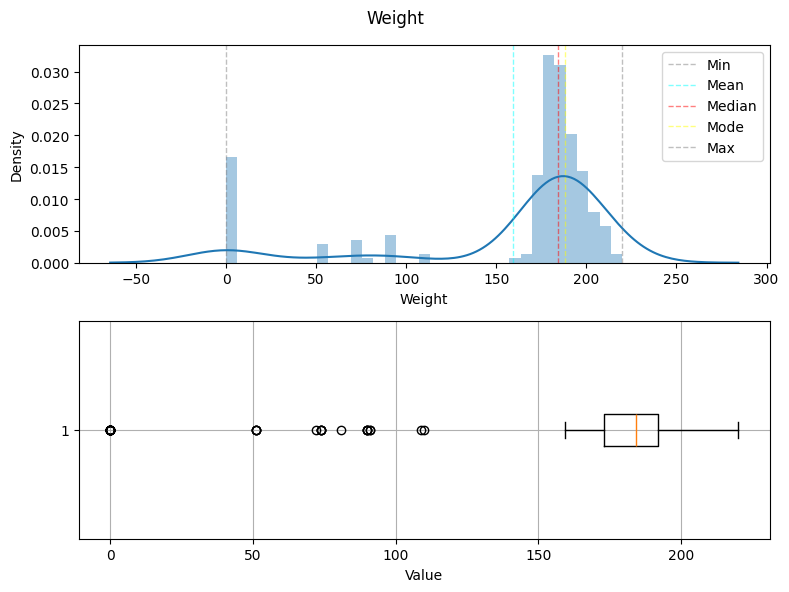

In [44]:
plot_distribution(df_cleaned['Weight'])

The minimum value is 400.00
The maximum value is 6000.00
The mean value is 4736.05
The median value is 5000.00
The mode values are [5000.]


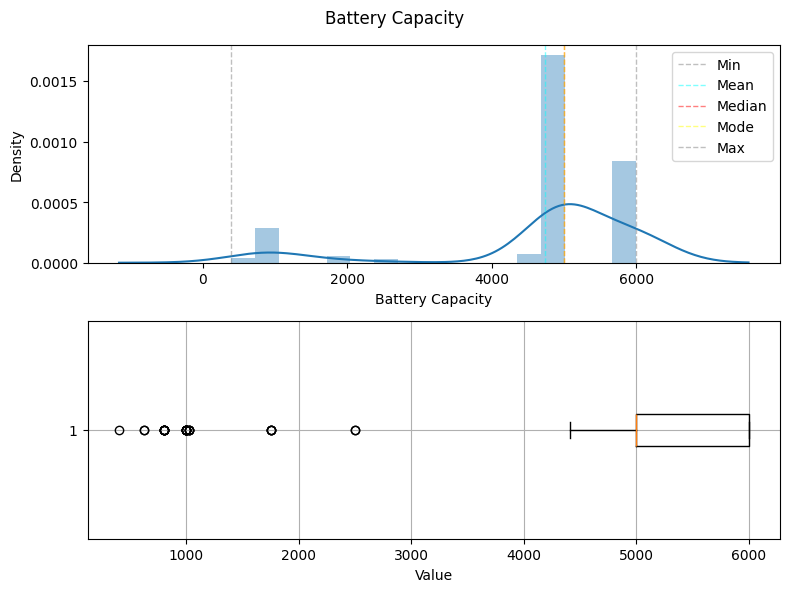

In [45]:
plot_distribution(df_cleaned['Battery Capacity'])

The minimum value is 0.00
The maximum value is 8.00
The mean value is 4.27
The median value is 4.00
The mode values are [4.]


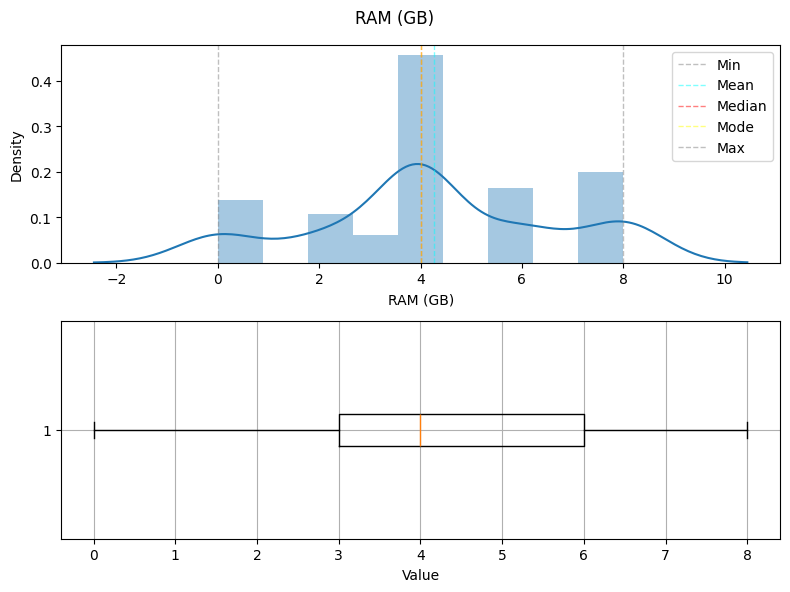

In [46]:
plot_distribution(df_cleaned['RAM (GB)'])

The minimum value is 0.00
The maximum value is 256.00
The mean value is 85.58
The median value is 106.79
The mode values are [128.]


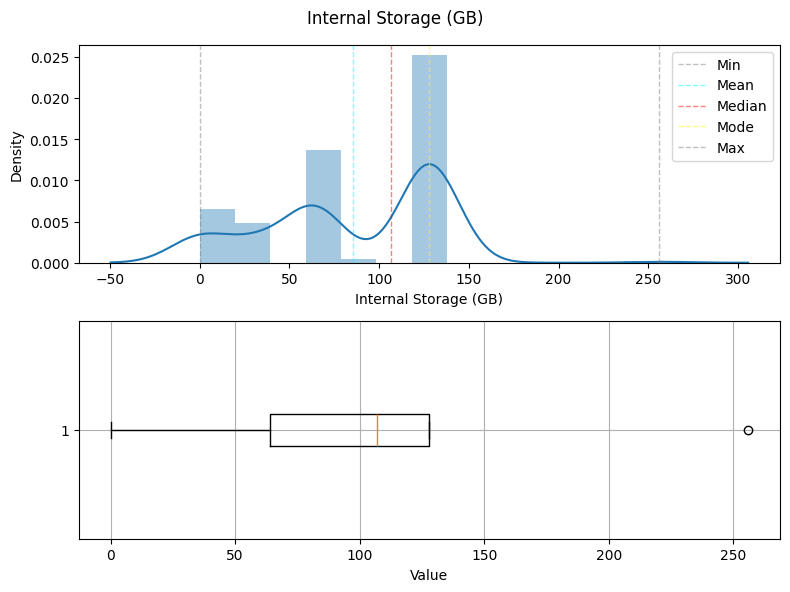

In [47]:
plot_distribution(df_cleaned['Internal Storage (GB)'])

<Axes: xlabel='Width', ylabel='Height'>

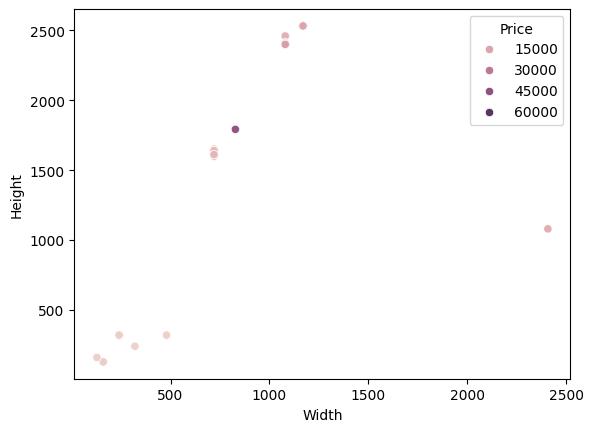

In [48]:
sns.scatterplot(df_cleaned, x='Width', y='Height', hue='Price')

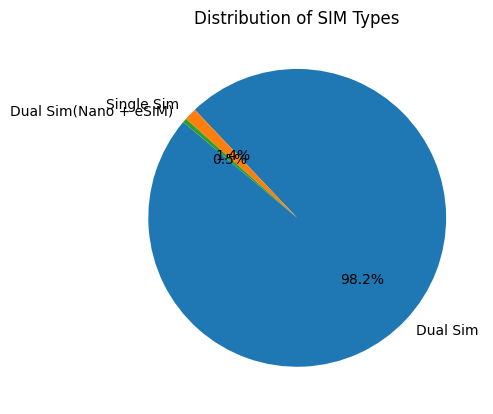

In [60]:
sim_labels = list(sim_mapping.keys())
plt.figure(figsize=(5, 5))
df_cleaned['SIM Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, labels=sim_labels)
plt.title('Distribution of SIM Types')
plt.tight_layout()
plt.ylabel('');

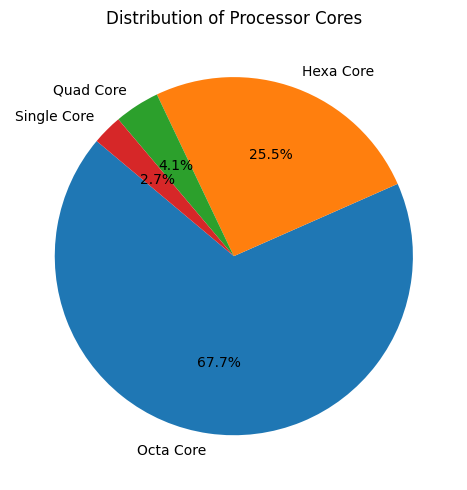

In [99]:
processor_labels = list(processor_mapping.keys())
plt.figure(figsize=(5, 5))
df_cleaned['Processor Core'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, labels=processor_labels)
plt.title('Distribution of Processor Cores')
plt.tight_layout()
plt.ylabel('');

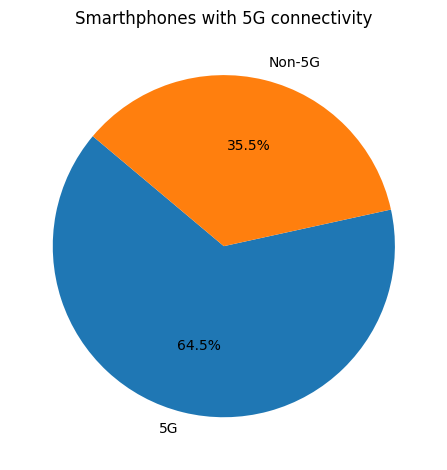

In [51]:
df_cleaned['5G'].value_counts().rename({1: '5G', 0: 'Non-5G'}).plot.pie(autopct='%1.1f%%', startangle=140, labels=['5G', 'Non-5G'])
plt.title('Smarthphones with 5G connectivity')
plt.tight_layout()
plt.ylabel('');

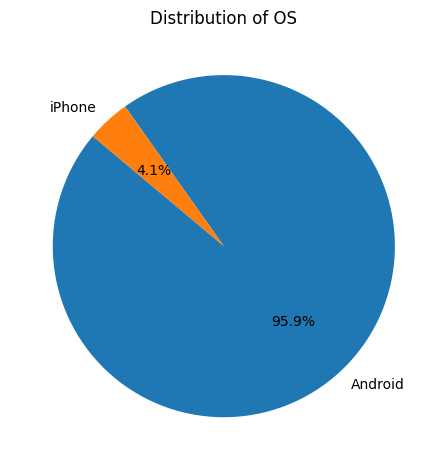

In [121]:
df_cleaned['OS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=list(os_map.keys()))
plt.title('Distribution of OS')
plt.tight_layout()
plt.ylabel('');

## Predicting Price

### Seperating independent and dependent features

In [182]:
dependent = 'Price'
independent = df_cleaned.select_dtypes(['int', 'float', 'bool']).iloc[:, 1:].columns
# independent = corr[dependent][corr[dependent].abs() > 0.1][1:].index
print(f'Dependent feature is {dependent}.\nIndependent features are {independent}')

Dependent feature is Price.
Independent features are Index(['SIM Type', 'Touchscreen', 'Processor Core', 'Internal Storage (GB)',
       'RAM (GB)', 'Primary Camera Available', 'Secondary Camera Available',
       'Secondary Camera (MP, Front Camera)', 'Full HD Recording',
       'Bluetooth Support', 'Wi-Fi', 'GPS Support', 'Battery Capacity',
       'Weight', 'Domestic Warranty', 'Product Rating', 'Camera Rating',
       'Battery Rating', 'Display Rating', 'Design Rating', '2G', '3G', '4G',
       '4G VOLTE', '5G', 'OS', 'Height', 'Width'],
      dtype='object')


### Train Test Split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[independent], df_cleaned[dependent], train_size=0.8, random_state=0)
print(f'X_train.shape = {X_train.shape}\nX_test.shape = {X_test.shape}\ny_train.shape = {y_train.shape}\ny_test.shape = {y_test.shape}')

X_train.shape = (176, 28)
X_test.shape = (44, 28)
y_train.shape = (176,)
y_test.shape = (44,)


## 1. Linear Regression
### Training

In [184]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [185]:
y_pred = model.predict(X_test)

### Evaluating Predictions

In [186]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2207.060826701783
Mean Squared Error (MSE): 7675328.8147022575
R-squared (R2): 0.9071050000929858


### Visualising Predictions 

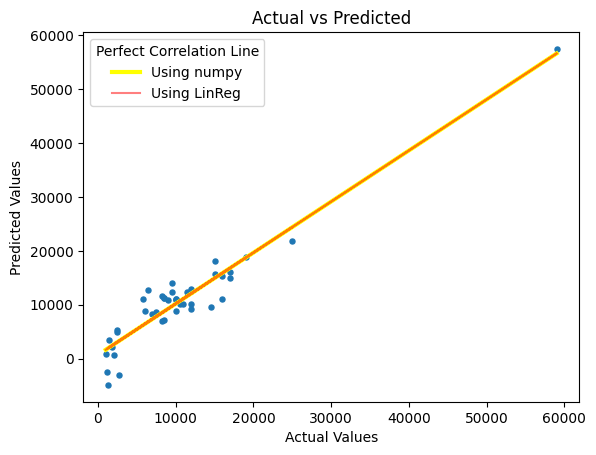

In [187]:
plt.scatter(y_test, y_pred, s = 13)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')


#Fline for perfect correlation
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='yellow', linewidth=3, label = 'Using numpy')

#Second method- Again applying Linear regression
lr2 = LinearRegression()
y_test_2 = np.array(y_test).reshape(-1, 1)
y_pred_2 = y_pred.reshape(-1, 1)
lr2.fit(y_test_2, y_pred_2)
plt.plot(y_test_2, lr2.predict(y_test_2), color='red', alpha = 0.5, label = 'Using LinReg')
plt.legend(title = 'Perfect Correlation Line')

#2 lines will coincide
#This fitted line helps visualize how well the predicted values align with the actual values.

## 2. Random Forest Regression
### Training

In [188]:
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [189]:
y_pred = rfg.predict(X_test)

### Evaluating Predictions

In [190]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1100.2926984126987
Mean Squared Error (MSE): 3653836.8637880622
R-squared (R2): 0.9557773766679982


### Visualising Predictions

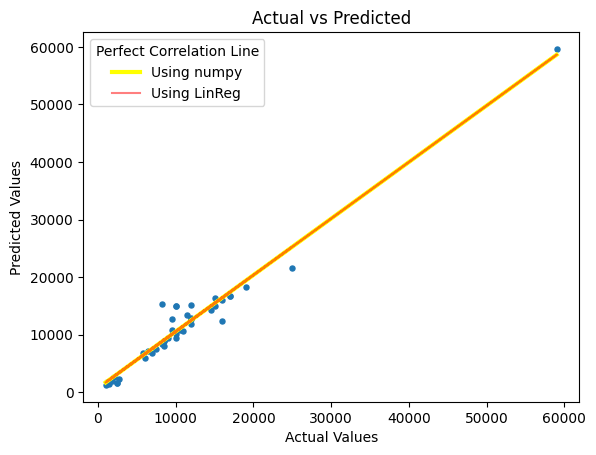

In [191]:
plt.scatter(y_test, y_pred, s = 13)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')


#Fline for perfect correlation
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='yellow', linewidth=3, label = 'Using numpy')

#Second method- Again applying Linear regression
lr2 = LinearRegression()
y_test_2 = np.array(y_test).reshape(-1, 1)
y_pred_2 = y_pred.reshape(-1, 1)
lr2.fit(y_test_2, y_pred_2)
plt.plot(y_test_2, lr2.predict(y_test_2), color='red', alpha = 0.5, label = 'Using LinReg')
plt.legend(title = 'Perfect Correlation Line')

#2 lines will coincide
#This fitted line helps visualize how well the predicted values align with the actual values.

## 3. Gradient Boosting Regression
### Training

In [196]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [197]:
y_pred = gbr.predict(X_test)

### Evaluating Predictions

In [198]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1158.0248829542422
Mean Squared Error (MSE): 2802674.6090272497
R-squared (R2): 0.9660790483599526


### Visualising Predictions

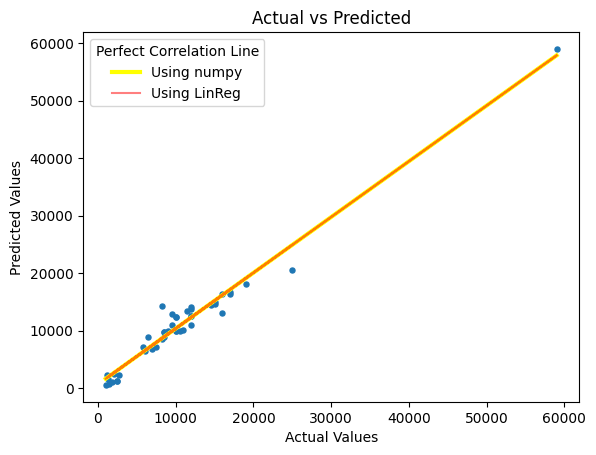

In [199]:
plt.scatter(y_test, y_pred, s = 13)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')


#Fline for perfect correlation
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='yellow', linewidth=3, label = 'Using numpy')

#Second method- Again applying Linear regression
lr2 = LinearRegression()
y_test_2 = np.array(y_test).reshape(-1, 1)
y_pred_2 = y_pred.reshape(-1, 1)
lr2.fit(y_test_2, y_pred_2)
plt.plot(y_test_2, lr2.predict(y_test_2), color='red', alpha = 0.5, label = 'Using LinReg')
plt.legend(title = 'Perfect Correlation Line')

#2 lines will coincide
#This fitted line helps visualize how well the predicted values align with the actual values.